In [16]:
import random
%pip install --upgrade firebase-admin
# %pip install  firebase-admin
# %pip install requests==1.1.0
# %pip install python-firebase
from sklearn.metrics import cohen_kappa_score,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
import matplotlib.pyplot as plt
import numpy as np

Requirement already up-to-date: firebase-admin in /usr/local/lib/python3.7/dist-packages (5.0.1)


In [3]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd gdrive/My\ Drive/'Colab Notebooks'/'SentiGAN-persuasion'
import firebase_admin
from firebase_admin import credentials, firestore, auth


cred = credentials.Certificate("Real_dataset/message-generation-firebase-adminsdk-o7l95-d2655c10e4.json")
firebase_admin.initialize_app(cred)
db = firestore.client()

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/SentiGAN-persuasion


In [ ]:
parti = db.collection(u'Participant').get();
print(len(parti))
parti = db.collection(u'Participant').where('done', u'==',True).get();
print(len(parti))


31
30


"Male"
(string)

spokenGroup
Beginner
Elementary English
Intermediate English
Upper-Intermediate
Advanced English
Proficiency

In [ ]:
dic_count={}
dic_count['Beginner']=0
dic_count['Elementary English']=0
dic_count['Upper-Intermediate']=0
dic_count['Intermediate English']=0
dic_count['Advanced English']=0
docs = db.collection(u'Participant').where(u'done','==',True).get();
print(len(docs))
for doc in docs:
    data=doc.to_dict()
    dic_count[data["writtenGroup"]]+=1
print(dic_count)

30
{'Beginner': 3, 'Elementary English': 10, 'Upper-Intermediate': 4, 'Intermediate English': 12, 'Advanced English': 1}


In [ ]:
models = ["Commitment","Liking","Consistency"]
codes_dic={'Commitment': ['Com001', 'Com002', 'Com003', 'Com004', 'Com005', 'Com006', 'Com007', 'Com008', 'Com009', 'Com010', 'Com011', 'Com012', 'Com013', 'Com014', 'Com015'], 'Liking': ['Lik001', 'Lik002', 'Lik003', 'Lik004', 'Lik005', 'Lik006', 'Lik007', 'Lik008', 'Lik009', 'Lik010', 'Lik011', 'Lik012', 'Lik013', 'Lik014', 'Lik015'], 'Consistency': ['Con001', 'Con002', 'Con003', 'Con004', 'Con005', 'Con006', 'Con007', 'Con008', 'Con009', 'Con010', 'Con011', 'Con012', 'Con013', 'Con014', 'Con015']}
RG_1=[]
RG_2=[]
results = []
for key in range(15):
  rating_1_i=[]
  rating_1_t=[]
  rating_2_i=[]
  rating_2_t=[]

  for model in models:
    docs = db.collection(model).where(u'group_code',u'==',codes_dic[model][key]).stream();
    for doc in docs:
      data=doc.to_dict()
      rating_1_i.append(data['rating_1']['inteligility'])
      rating_1_t.append(data['rating_1']['typeacuracy'])
      rating_2_i.append(data['rating_2']['inteligility'])
      rating_2_t.append(data['rating_2']['typeacuracy'])
      RG_1.append(data['rating_1']['inteligility'])
      RG_2.append(data['rating_2']['inteligility'])
      # RG_1.append(data['rating_1']['typeacuracy'])
      # RG_2.append(data['rating_2']['typeacuracy'])
      # print(cohen_kappa_score([data['rating_1']['inteligility']],[data['rating_2']['inteligility']])) #kappa cohen
  # print('rating_1: ', rating_1_i)
  # print('rating_2: ', rating_2_i)
  # cohen_score = cohen_kappa_score(rating_1_i, rating_2_i,weights='linear')
  # cohen_score = cohen_kappa_score(rating_1_i, rating_2_i,weights='quadratic')
  cohen_score = cohen_kappa_score(rating_1_t, rating_2_t,weights='quadratic')
  results.append(cohen_score);
  print('cohen_kappa_score to ',codes_dic[model][key],' : ',cohen_score)
cohen_score_general = cohen_kappa_score(RG_1,RG_2,weights='quadratic')
print('general cohen',cohen_score_general)
  
  

cohen_kappa_score to  Con001  :  0.33333333333333337
cohen_kappa_score to  Con002  :  0.21383647798742145
cohen_kappa_score to  Con003  :  -0.008676789587852562
cohen_kappa_score to  Con004  :  -0.38065522620904835
cohen_kappa_score to  Con005  :  -0.15808823529411775
cohen_kappa_score to  Con006  :  0.022140221402214055
cohen_kappa_score to  Con007  :  -0.024464831804281495
cohen_kappa_score to  Con008  :  0.36363636363636365
cohen_kappa_score to  Con009  :  0.31958762886597947
cohen_kappa_score to  Con010  :  0.09365558912386707
cohen_kappa_score to  Con011  :  0.019292604501607746
cohen_kappa_score to  Con012  :  0.11764705882352944
cohen_kappa_score to  Con013  :  -0.22857142857142865
cohen_kappa_score to  Con014  :  0.044585987261146376
cohen_kappa_score to  Con015  :  -0.05095541401273884
general cohen 0.41176693467108205


In [ ]:
std=np.std(results)
mean=np.mean(results)
print(std)
print(mean)

0.2019208353817212
0.04508688929706633


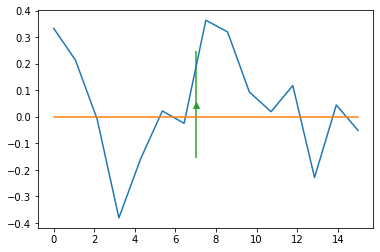

In [ ]:
%matplotlib inline
x = np.linspace(0, 15, 15)
 
plt.plot(x, results)
plt.plot([0,15],[0,0])#linea 0
plt.errorbar(7,mean, std, linestyle='None', marker='^')
 
plt.show()

In [22]:
codes_dic={'Commitment': ['Com001', 'Com002', 'Com003', 'Com004', 'Com005', 'Com006', 'Com007', 'Com008', 'Com009', 'Com010', 'Com011', 'Com012', 'Com013', 'Com014', 'Com015'], 'Liking': ['Lik001', 'Lik002', 'Lik003', 'Lik004', 'Lik005', 'Lik006', 'Lik007', 'Lik008', 'Lik009', 'Lik010', 'Lik011', 'Lik012', 'Lik013', 'Lik014', 'Lik015'], 'Consistency': ['Con001', 'Con002', 'Con003', 'Con004', 'Con005', 'Con006', 'Con007', 'Con008', 'Con009', 'Con010', 'Con011', 'Con012', 'Con013', 'Con014', 'Con015']}
type_code={'Commitment': 0, 'Liking': 1, 'Consistency': 2}

rating_i=[]
model_type=[]
rating_t=[]
for model,codes in codes_dic.items():
    ref = db.collection(model)
    # print(model)
    for code in codes:
      docs=ref.where(u'group_code',u'==',code).stream()
      for doc in docs:
        data=doc.to_dict()
        if(data['rating_1']['typeacuracy']!="I'm not sure"):
          model_type.append(model);
          rating_t.append(data['rating_1']['typeacuracy'])

        if(data['rating_2']['typeacuracy']!="I'm not sure"):
          model_type.append(model);
          rating_t.append(data['rating_2']['typeacuracy'])

# print(len(rating_t));
cm=confusion_matrix(model_type, rating_t, labels=["Commitment", "Liking", "Consistency"])
acc=accuracy_score(model_type, rating_t,)
print(cm)     
print("accuracy_score: ", acc)     

[[46 24 27]
 [39 23 45]
 [41 21 35]]
accuracy_score:  0.27807486631016043


[46 24 27 39 23 45 41 21 35]


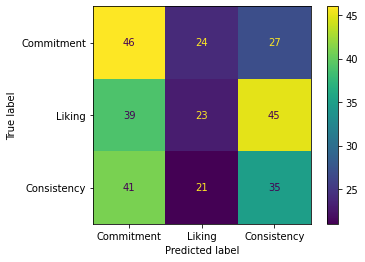

In [23]:
# cm=confusion_matrix(model_type, model_type, labels=["Commitment", "Liking", "Consistency"])
print(cm.ravel())     
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=["Commitment", "Liking", "Consistency"])
disp.plot() 

In [14]:
codes_dic={'Commitment': ['Com001', 'Com002', 'Com003', 'Com004', 'Com005', 'Com006', 'Com007', 'Com008', 'Com009', 'Com010', 'Com011', 'Com012', 'Com013', 'Com014', 'Com015'], 'Liking': ['Lik001', 'Lik002', 'Lik003', 'Lik004', 'Lik005', 'Lik006', 'Lik007', 'Lik008', 'Lik009', 'Lik010', 'Lik011', 'Lik012', 'Lik013', 'Lik014', 'Lik015'], 'Consistency': ['Con001', 'Con002', 'Con003', 'Con004', 'Con005', 'Con006', 'Con007', 'Con008', 'Con009', 'Con010', 'Con011', 'Con012', 'Con013', 'Con014', 'Con015']}

dic_count={}
dic_count[1]=0
dic_count[2]=0
dic_count[3]=0
dic_count[4]=0
dic_count[5]=0

rating_i=[]
total=0
for model,codes in codes_dic.items():
    ref = db.collection(model)
    # print(model)
    for code in codes:
      docs=ref.where(u'group_code',u'==',code).stream()
      for doc in docs:
        data=doc.to_dict()
        dic_count[data['rating_1']['inteligility']]+=1
        dic_count[data['rating_2']['inteligility']]+=1
        total+=2

print(total)
print(dic_count)
# 5 stars:Totally understandable
# 4 stars:Understandable
# 3 stars:Acceptable
# 2 stars:Incomprehensible
# 1 stars:Random words
sizes=[]
for key, value in dic_count.items():
  print()  
  print(key,' :: ',value/450*100)  
  sizes.append(value/450*100)

450
{1: 43, 2: 95, 3: 135, 4: 128, 5: 49}

1  ::  9.555555555555555

2  ::  21.11111111111111

3  ::  30.0

4  ::  28.444444444444443

5  ::  10.888888888888888


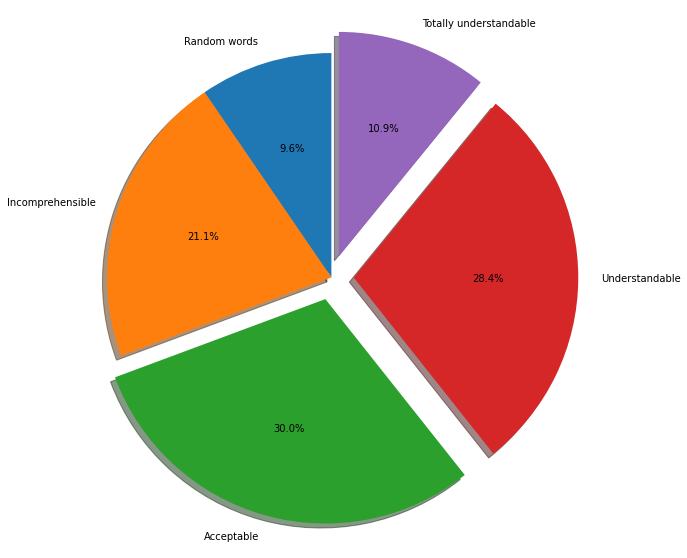

In [26]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Random words', 'Incomprehensible', 'Acceptable', 'Understandable','Totally understandable'

explode = (0,0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()